# Aerofit - Case Study

## Problem Statement

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.
Dataset

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

Dataset link: Aerofit_treadmill.csv

Product Purchased:	KP281, KP481, or KP781
- Age:	In years
- Gender:	Male/Female
- Education:	In years
- MaritalStatus:	Single or partnered
- Usage:	The average number of times the customer plans to use the treadmill each week.
- Income:	Annual income (in $)
- Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles:	The average number of miles the customer expects to walk/run each week
- Product Portfolio:

- The KP281 is an entry-level treadmill that sells for $1,500.
- The KP481 is for mid-level runners that sell for $1,750.
- The KP781 treadmill is having advanced features that sell for $2,500.


In [1]:
# Importing the Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the data
df = pd.read_csv('Aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## Checking characteristics of data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [5]:
# Checking the unique values in the data
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [6]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [7]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

- The dataset has 180 records with with 3 categorical and 6 numerical features
- There are no null values in the data so we don't have to change anything.
- The datatypes assigned to each of the attributes are right and don't need any intervention.
- There are three unique products and the 'KP281' seems to be the best selling product
- Most customers are male and most of them are partnered

In [8]:
# Dividing numerical and categorical columns
cat_cols = [n for n in df.columns if df[n].dtypes == 'object']
print(cat_cols)

num_cols = [n for n in df.columns if n not in cat_cols]
print(num_cols)

['Product', 'Gender', 'MaritalStatus']
['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']


In [9]:
# Adding cost column
df['Cost'] = np.nan
df.loc[df['Product'] == 'KP281', 'Cost'] = 1500
df.loc[df['Product'] == 'KP481', 'Cost'] = 1750
df.loc[df['Product'] == 'KP781', 'Cost'] = 2500

### Checking the distribution of numerical features

In [10]:
prod_dist = df['Product'].value_counts(normalize = True)
keys = list(prod_dist.keys())
values = list(prod_dist.values)

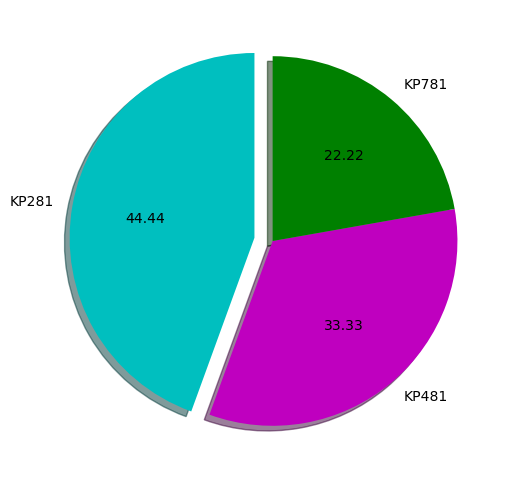

In [11]:
# Distribution of Products
plt.figure(figsize = (10,6))
plt.pie(values,
       labels= keys ,
       colors=["c","m","g"],
       startangle=90,
       shadow=True,
       explode=(0.1,0,0),
       autopct='%.2f')
plt.show()

- 44.44 % of the customer buy KP281 product which is cheaper as compared to other two, indicating cost sensitive market

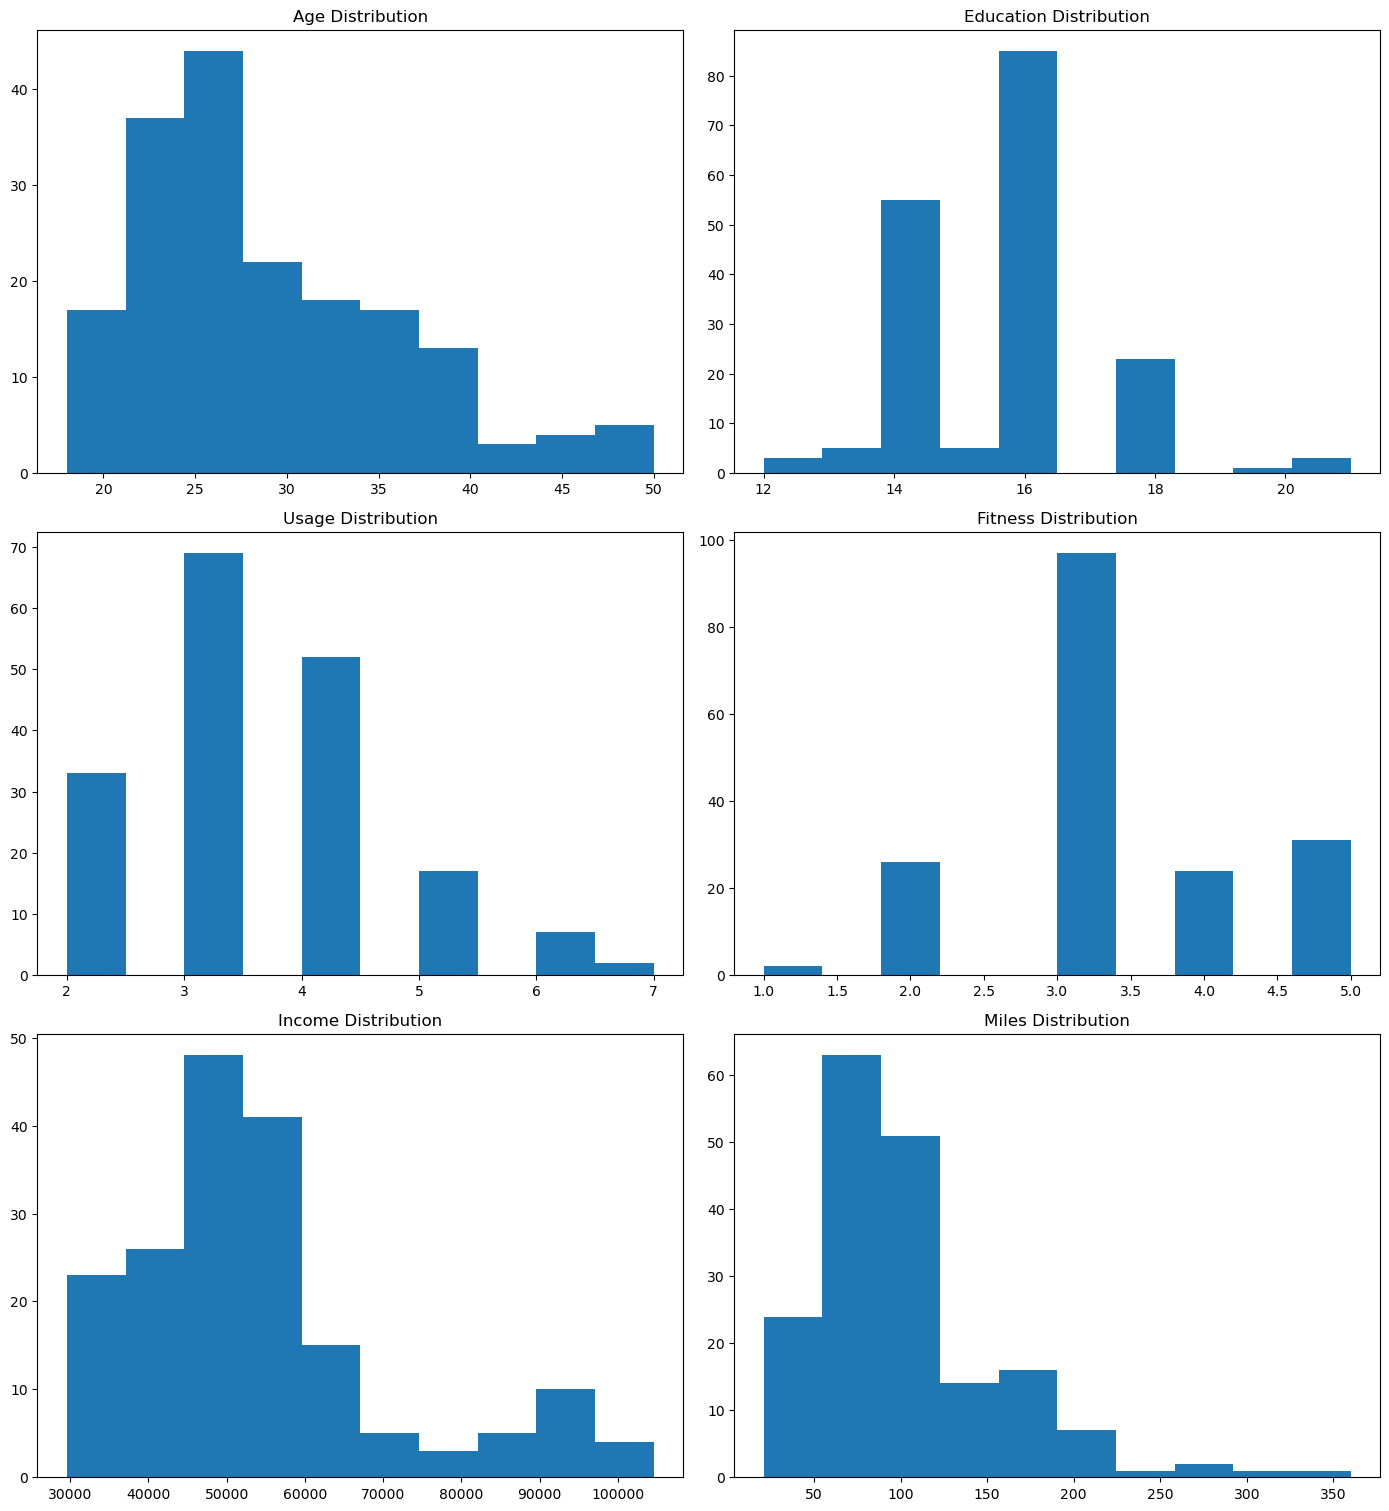

In [12]:
# Checking the distribution of numerical features
plt.figure(figsize = (14,20))
for i in range(len(num_cols)):
    plt.subplot(4,2,i+1)
    plt.hist(df[num_cols[i]])
    plt.title(f'{num_cols[i]} Distribution')
plt.tight_layout()

The above plots suggests:
- Most customers are young and lie between the age range of 20 to 30 years old
- Majority of the customer have studied for 14 ro 16 years
- Most customers will use the treadmills for 3-4 hours and less number of people will be using treadmills for more than 4 hours.
- Majority of the customers consider their fitness in the average fitness range, while very less people with lower fitness levels are customers.
- The income distribution is right skewed indicating the majority of customers have income range between 30K and 60K. And there are very less people with income more that 60K
- Similar to income the distribution for the average miles covered by the customers is right skewed, again indicating majority of the people tend to cover 50 to 120 miles per week on an average. Very few people cover more than 200 miles.


### Outlier Detection

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

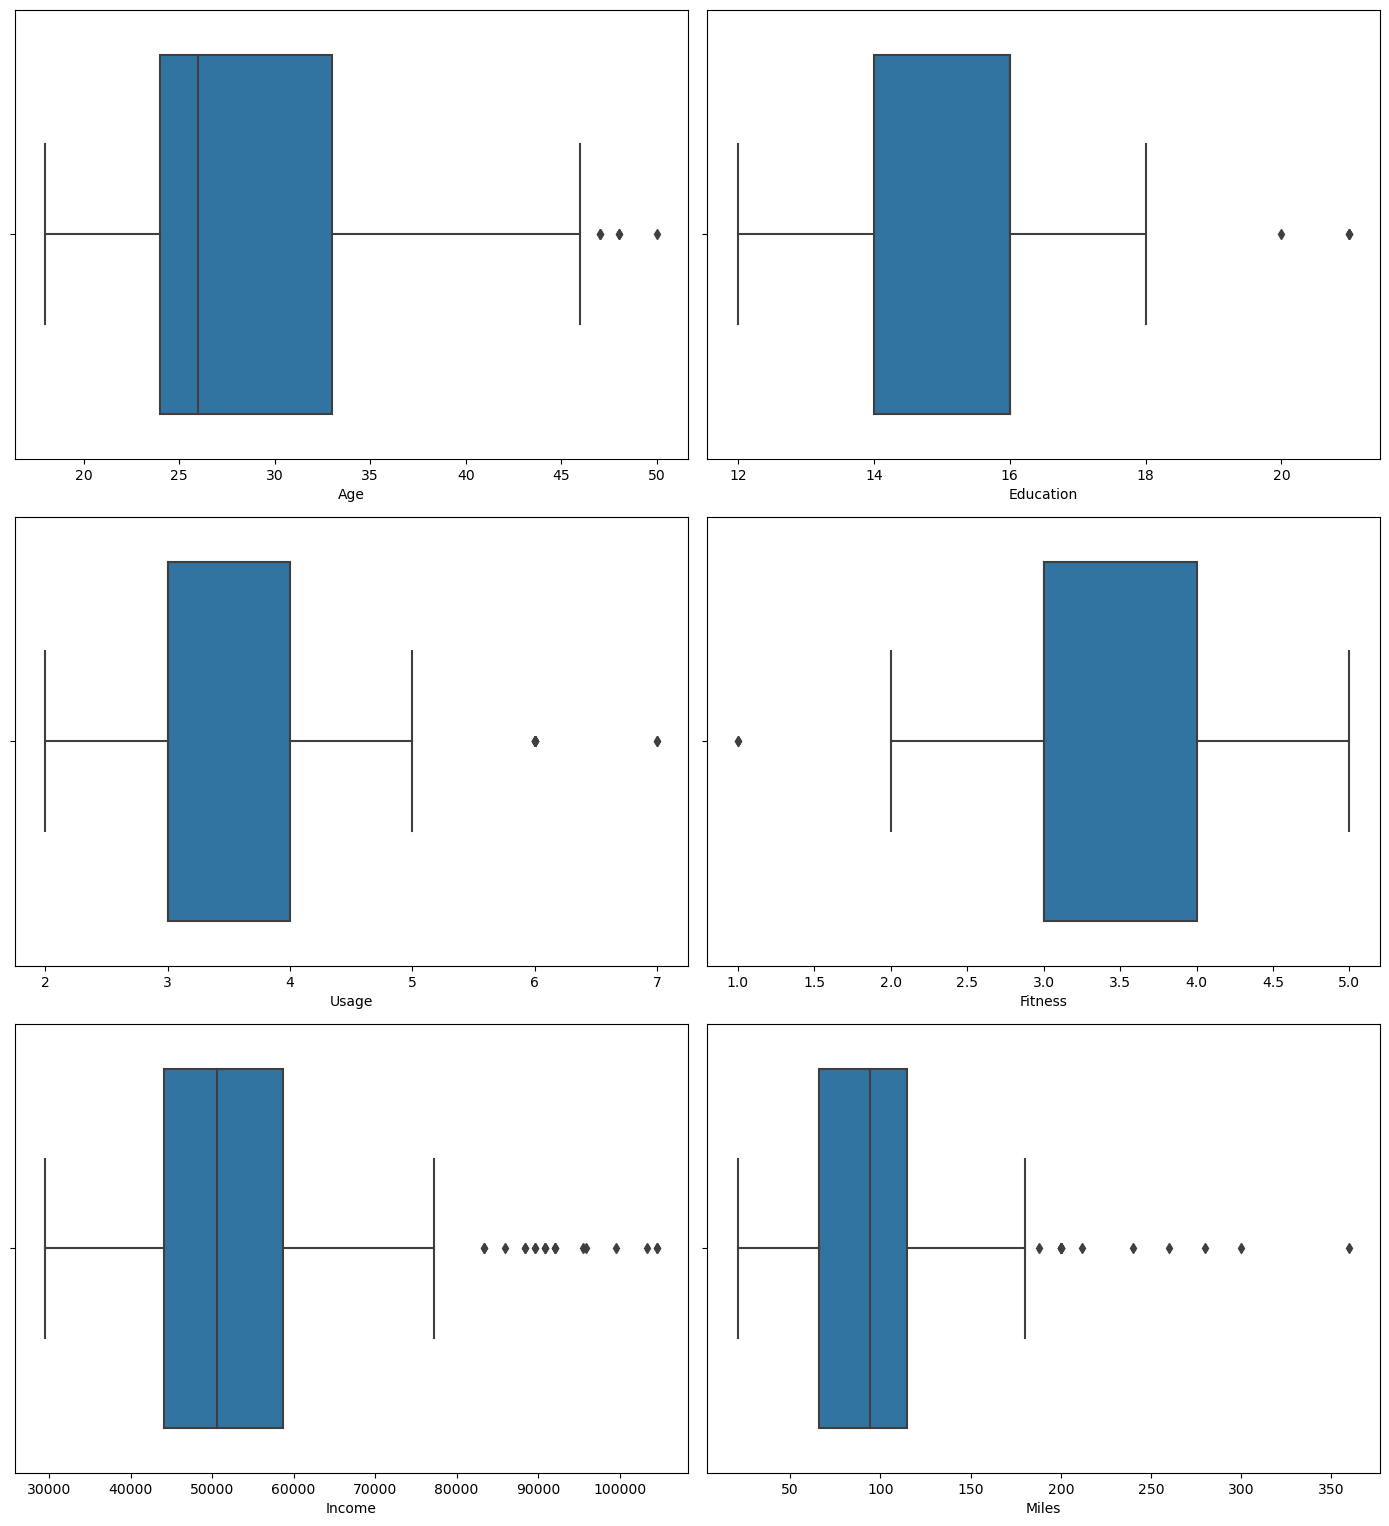

In [13]:
# Outlier Detection

plt.figure(figsize = (14,20))
for i in range(len(num_cols)):
    plt.subplot(4,2,i+1)
    sns.boxplot(df[num_cols[i]], orient = 'v')
plt.tight_layout()

In [14]:
outlier_count = {}
outlier_percentage = {}
for i in num_cols:
    q1 = np.quantile(df[i],0.25)
    q2 = np.quantile(df[i],0.5)
    q3 = np.quantile(df[i],0.75)
    IQR = q3-q1
    Upper_wisker = q3 + 1.5*IQR
    
    out_count = len(df[df[i] > Upper_wisker])
    percentage_out = round(len(df[df[i] > Upper_wisker])/len(df),2)
    
    outlier_count[i] = out_count
    outlier_percentage[i] = percentage_out

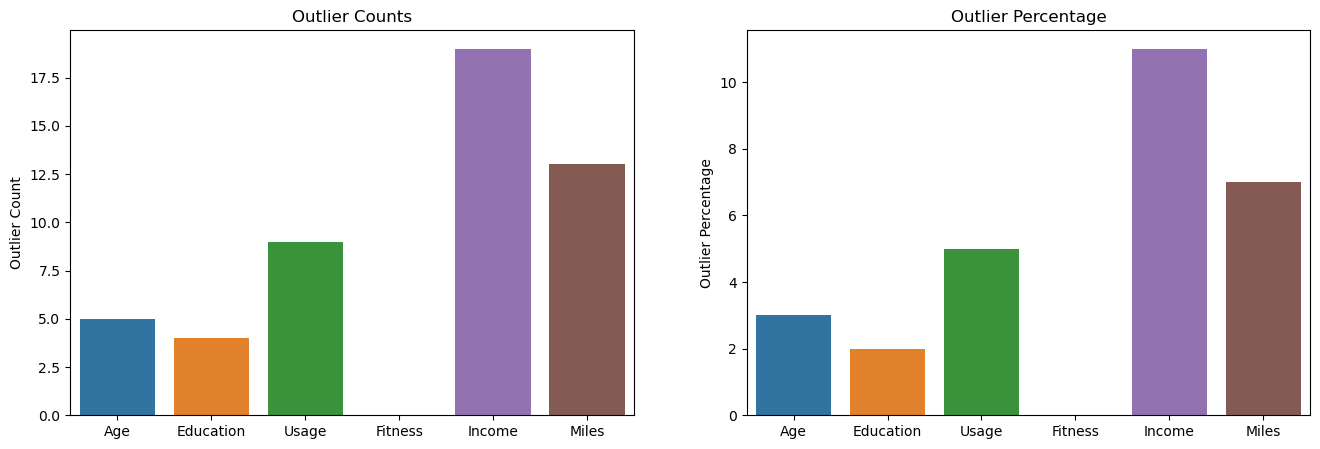

In [15]:
# Checking outlier numbers
plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
sns.barplot(x = list(outlier_count.keys()), y = list(outlier_count.values()))
plt.ylabel('Outlier Count')
plt.title('Outlier Counts')

plt.subplot(1,2,2)
sns.barplot(x = list(outlier_percentage.keys()), y = np.array(list(outlier_percentage.values()))*100)
plt.ylabel('Outlier Percentage')
plt.title('Outlier Percentage')

plt.show()

- We have Income and Miles fields with more than 10% outliers which we can fix by replacing them with mean, but in this case we will keep all the data as the data size is small.

### Checking if features like marital status, age have any effect on the product purchased

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


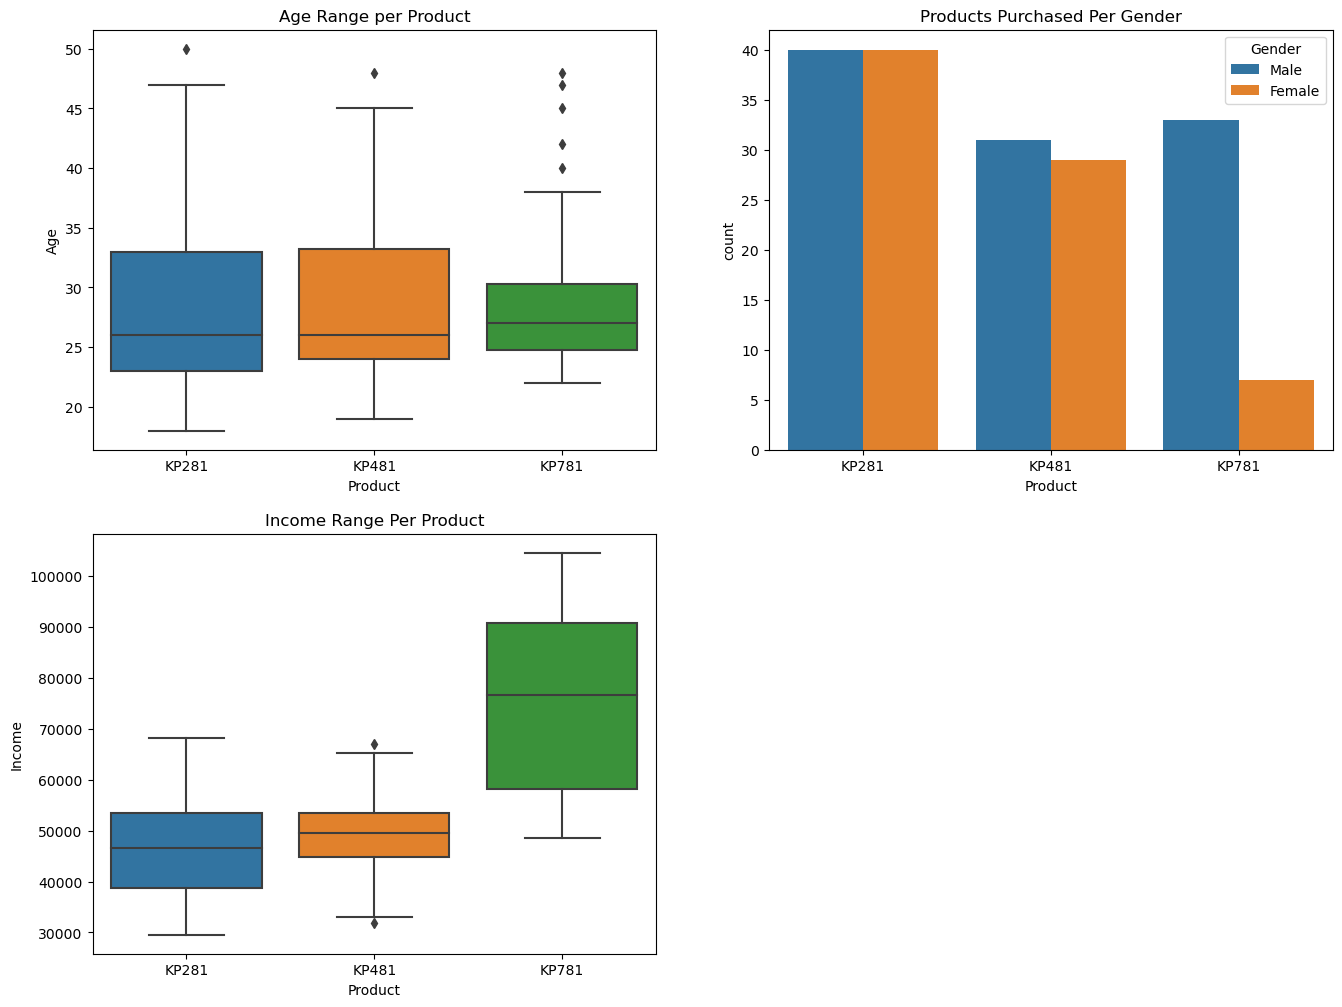

In [16]:
plt.figure(figsize = (16,12))

plt.subplot(2,2,1)
sns.boxplot(y = df['Age'], x = df['Product'], orient = 'v')
plt.title('Age Range per Product', )

plt.subplot(2,2,2)
sns.countplot(df['Product'], hue = df['Gender'])
plt.title('Products Purchased Per Gender')

## Income range for each product
# plt.figure(figsize = (8,5))
plt.subplot(2,2,3)
sns.boxplot(x = df['Product'], y = df['Income'])
plt.title('Income Range Per Product')
plt.show()

**Age**
- For the products KP281 & KP481 mostly the customer age lies in the range of 23 to 33 years.
- While the customers purchasing product-KP781 are on the younger side ranging in between 25 to 30 years old.

**Gender**
- For the products KP281 & KP481 the customers are equally distributed in terms of gender, however, for product KP781 the number of male customers is way higher than the number of females.

**Income**
- Customers with higher income range of 60000 to 90000 are buying the KP781 product. 
- Mostly the income for KP281 customers lie in between 40000 to 52000 and for KP482 customers it lies in between 47000 to 52000.

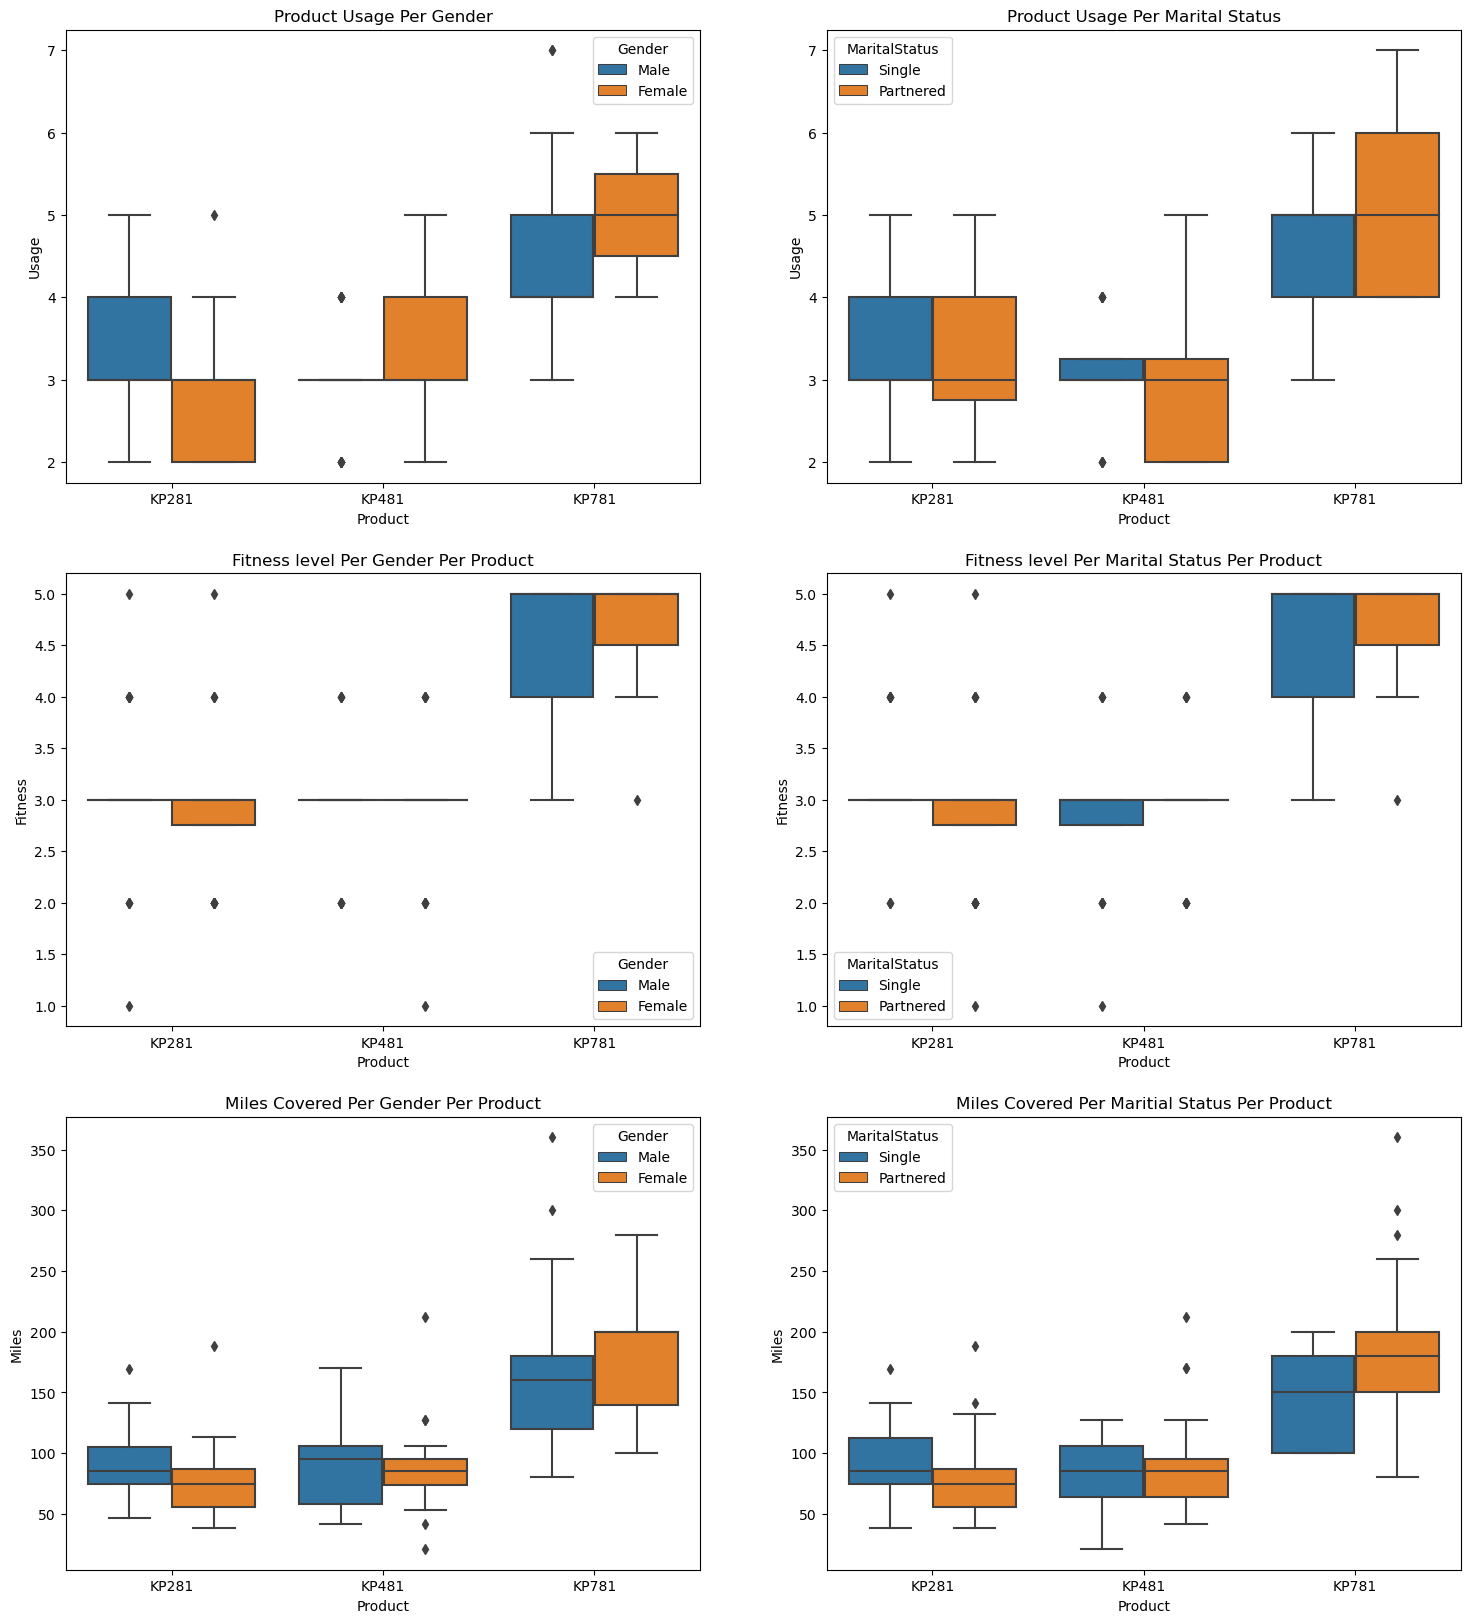

In [17]:
plt.figure(figsize = (18,20))

plt.subplot(3,2,1)
sns.boxplot(y = df['Usage'], x = df['Product'], hue = df['Gender'])
plt.title('Product Usage Per Gender')

plt.subplot(3,2,2)
sns.boxplot(y = df['Usage'], x = df['Product'], hue = df['MaritalStatus'])
plt.title('Product Usage Per Marital Status')

plt.subplot(3,2,3)
sns.boxplot(y = df['Fitness'], x = df['Product'], hue = df['Gender'])
plt.title('Fitness level Per Gender Per Product')

plt.subplot(3,2,4)
sns.boxplot(y = df['Fitness'], x = df['Product'],hue = df['MaritalStatus'])
plt.title('Fitness level Per Marital Status Per Product')

plt.subplot(3,2,5)
sns.boxplot(y = df['Miles'], x = df['Product'], hue = df['Gender'])
plt.title('Miles Covered Per Gender Per Product', )

plt.subplot(3,2,6)
sns.boxplot(y = df['Miles'], x = df['Product'], hue = df['MaritalStatus'])
plt.title('Miles Covered Per Maritial Status Per Product')

plt.show()

The above plots suggest :

**Usage**
- Females customers buying higher end product have more usage as compared to men, and it's completely opposite for the lower end products.
- Partenered customers have more usage as compared to single customers

**Fitness Level**
- The customers from both the genders buying the higher end product i.e. KP781 claim to have better fitness level than customers with lower end product i.e. KP281 & KP481
- Similar is the case with marital status

**Miles Covered**
- Both male and female customers having higher end product cover more miles per week that the customers with lower end product
- Similar is the case with marital status

### Analysing continuous variables

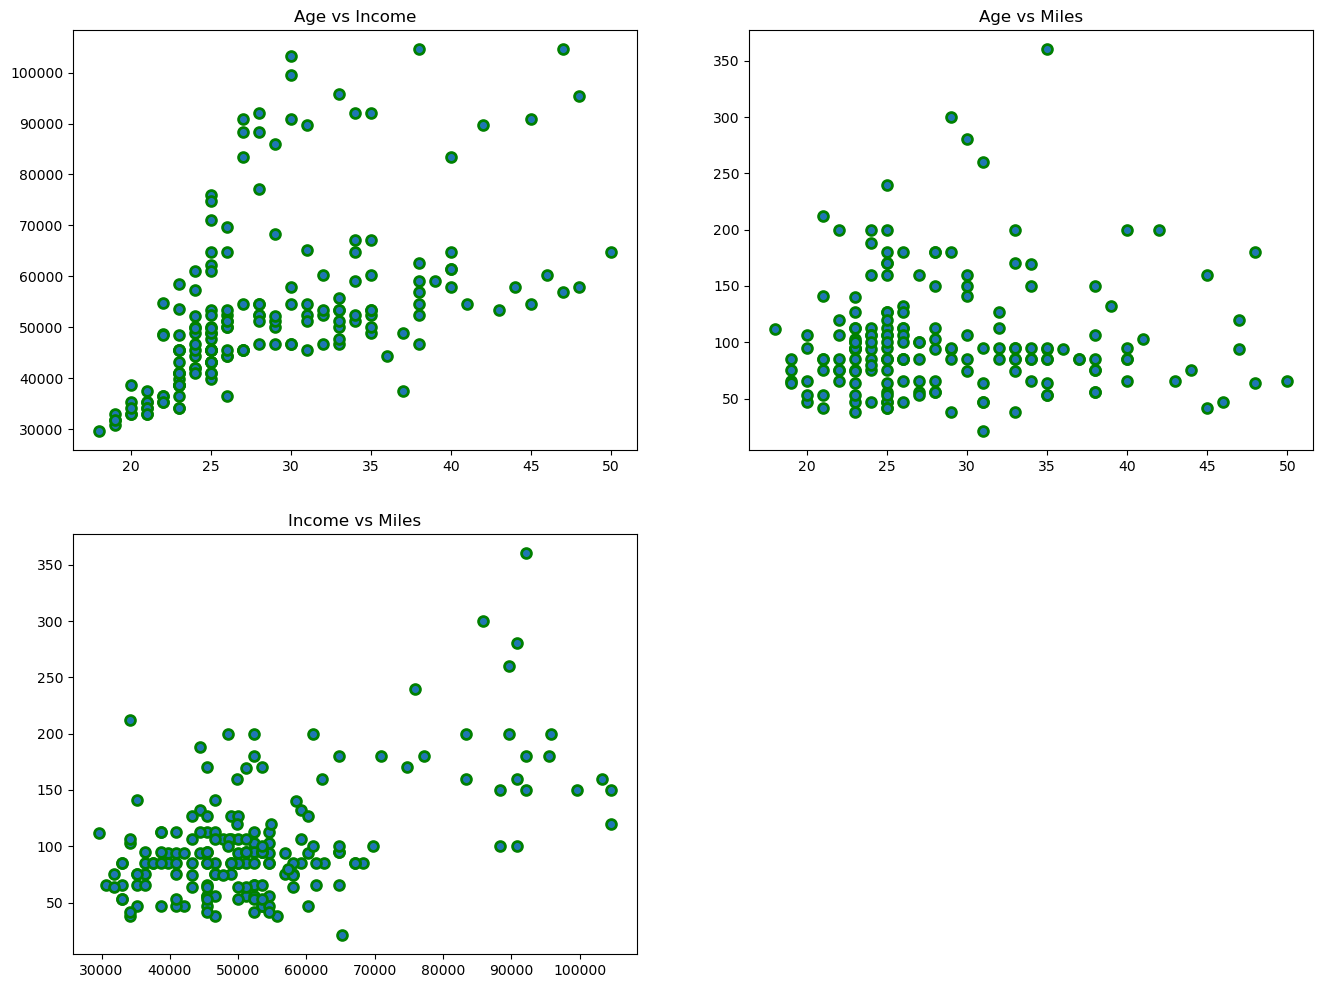

In [67]:
plt.figure(figsize = (16,12))


plt.scatter(df['Age'], df['Income'], linewidths = 2, marker ="o", edgecolor ="green", s = 50)

plt.subplot(2,2,1)
plt.scatter(df['Age'], df['Income'], linewidths = 2, marker ="o", edgecolor ="green", s = 50)
plt.title('Age vs Income')

plt.subplot(2,2,2)
plt.scatter(df['Age'], df['Miles'], linewidths = 2, marker ="o", edgecolor ="green", s = 50)
plt.title('Age vs Miles')

plt.subplot(2,2,3)
plt.scatter(df['Income'], df['Miles'], linewidths = 2, marker ="o", edgecolor ="green", s = 50)
plt.title('Income vs Miles')
plt.show()

- The variance of income in lower ages is smaller as compared to the variance in higher ages, probably something called as **Heteroscadasticity**.
- No significant pattern or observation between Age and Miles run on a treadmill, also implied by heatmap with a correlation of 0.037.
- The miles run on treadmill increase significantly with income, infact only people having incomes above 70000 have run over 220 miles. Moreover there's also a **Heteroscadastic** effect.

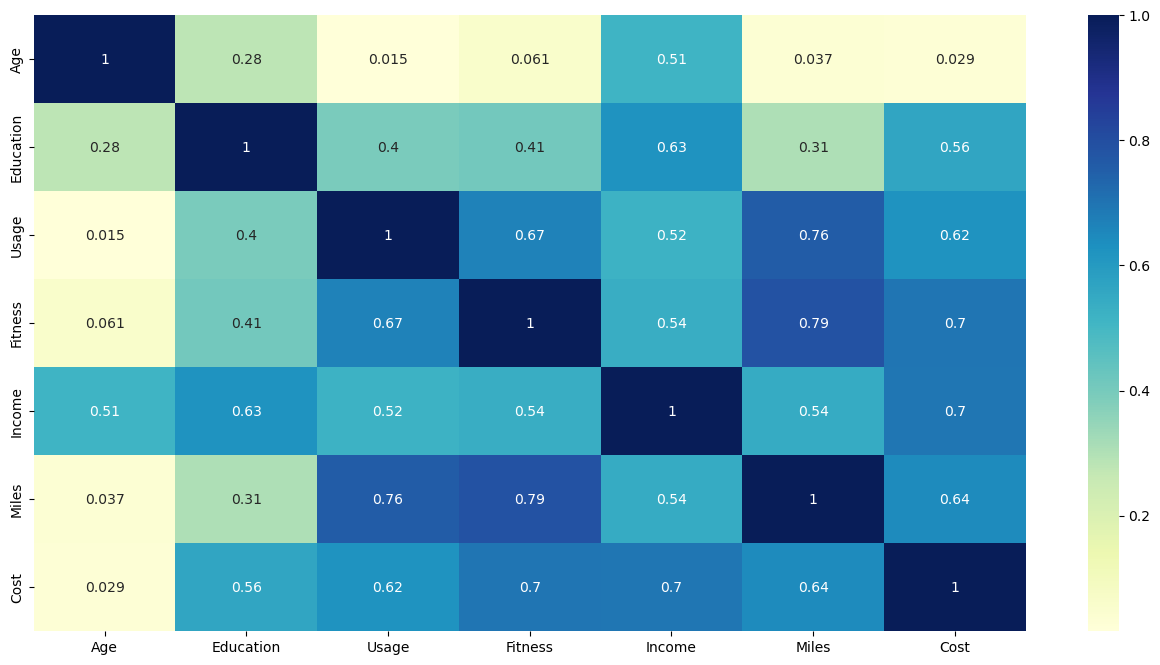

In [19]:
### Checking the relationship between the features
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

The above plot shows:
- Miles covered and fitness fields have high corelation, indicating the more miles you cover the better will be the fitness
- Also, miles and usage have higer corelation, suggesting higher the usage, higher will be the miles covered.
- Cost and income too has higher corelation, again suggesting higher the income, more costly will be the product bought.

# Probabilities

In [20]:
# Creating age bins
age_bins = [15,30,40,55]
df['Age_type'] = pd.cut(df['Age'], bins = age_bins, labels = ['Young','Middle_Aged','Old'])

# Creating income bins
income_bins = [0,50000,80000,120000]
df['Income_Level'] = pd.cut(df['Income'], income_bins, labels = ['Low','Medium','High'])

# Creating price bins
Cost_bins = [0,1700,2200,3000]
df['Price_Range'] = pd.cut(df['Cost'], Cost_bins, labels = ['Lower_end','Average','Higher_end'])

In [21]:
# Creating categories for numerical columns

# Creating Usage category
df['Usage_type'] = np.nan
df.loc[df['Usage'].isin([1,2,3]), 'Usage_type'] = 'Low'
df.loc[df['Usage'].isin([4,5,6]), 'Usage_type'] = 'Medium'
df.loc[df['Usage'].isin([7,8,9,10]), 'Usage_type'] = 'High'


df['Fitness_level'] = np.nan
df.loc[df['Fitness'].isin([1,2]), 'Fitness_level'] = 'Low'
df.loc[df['Fitness'] == 3, 'Fitness_level'] = 'Medium'
df.loc[df['Fitness'].isin([4,5]), 'Fitness_level'] = 'High'

In [22]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost,Age_type,Income_Level,Price_Range,Usage_type,Fitness_level
0,KP281,18,Male,14,Single,3,4,29562,112,1500.0,Young,Low,Lower_end,Low,High
1,KP281,19,Male,15,Single,2,3,31836,75,1500.0,Young,Low,Lower_end,Low,Medium
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500.0,Young,Low,Lower_end,Medium,Medium
3,KP281,19,Male,12,Single,3,3,32973,85,1500.0,Young,Low,Lower_end,Low,Medium
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500.0,Young,Low,Lower_end,Medium,Low


### Marginal Probabilities

In [23]:
# Probability of being a female and male customer
pd.crosstab(df['Gender'], df['Product'], margins = True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [24]:
# Probability of being a male customer
# From the above table
total_males = 104
total_customers = 180

Prob_male_customer = (total_males/total_customers)*100

# Probability of being a male customer
total_females = 76
Prob_female_customer = (total_females/total_customers)*100

print(f'Probability of being a male customer is : {round(Prob_male_customer,2)} %')
print(f'Probability of being a female customer is : {round(Prob_female_customer,2)} %')

Probability of being a male customer is : 57.78 %
Probability of being a female customer is : 42.22 %


In [25]:
# Probability of buying different products
total_products = 180
KP281_count = 80
KP481_count = 60
KP781_count = 40

Prob_buying_KP281 = (KP281_count/total_products)*100
Prob_buying_KP481 = (KP481_count/total_products)*100
Prob_buying_KP781 = (KP781_count/total_products)*100

print(f'Probability of buying KP281 model : {round(Prob_buying_KP281,2)} %')
print(f'Probability of buying KP281 model : {round(Prob_buying_KP481,2)} %')
print(f'Probability of buying KP781 model : {round(Prob_buying_KP781,2)} %')

Probability of buying KP281 model : 44.44 %
Probability of buying KP281 model : 33.33 %
Probability of buying KP781 model : 22.22 %


In [26]:
# Price range vs Usage
pd.crosstab(df['Usage_type'], df['Price_Range'], margins = True)

Price_Range,Lower_end,Average,Higher_end,All
Usage_type,,,,
High,0,0,2,2
Low,56,45,1,102
Medium,24,15,37,76
All,80,60,40,180


In [27]:
# Probability of buying a product in variour price ranges
total = 180
Lower = 80
Average = 60
Higher = 40

Prob_low = (Lower/total)*100
Prob_mid = (Average/total)*100
Prob_high = (Higher/total)*100

print(f'Probability of buying a lower end product : {round(Prob_low,2)} %')
print(f'Probability of buying averagly priced product : {round(Prob_mid,2)} %')
print(f'Probability of buying higher end product : {round(Prob_high,2)} %')

Probability of buying a lower end product : 44.44 %
Probability of buying averagly priced product : 33.33 %
Probability of buying higher end product : 22.22 %


In [28]:
# Probability of different usage types
total = 180
Lower = 102
Average = 76
Higher = 2

Prob_low = (Lower/total)*100
Prob_mid = (Average/total)*100
Prob_high = (Higher/total)*100

print(f'Probability of having lower usage hours per week : {round(Prob_low,2)} %')
print(f'Probability of having medium usage hours per week : {round(Prob_mid,2)} %')
print(f'Probability of having higher usage hours per week : {round(Prob_high,2)} %')

Probability of having lower usage hours per week : 56.67 %
Probability of having medium usage hours per week : 42.22 %
Probability of having higher usage hours per week : 1.11 %


In [29]:
# marital Status vs Income level
pd.crosstab(df['MaritalStatus'], df['Income_Level'], margins = True)

Income_Level,Low,Medium,High,All
MaritalStatus,,,,
Partnered,43,51,13,107
Single,40,27,6,73
All,83,78,19,180


In [30]:
# Probability for different income types
total = 180
Lower = 83
Average = 78
Higher = 19

Prob_low = (Lower/total)*100
Prob_mid = (Average/total)*100
Prob_high = (Higher/total)*100

print(f'Probability of customer with lower income level : {round(Prob_low,2)} %')
print(f'Probability of customer with medium income level : {round(Prob_mid,2)} %')
print(f'Probability of customer with higher income level : {round(Prob_high,2)} %')

Probability of customer with lower income level : 46.11 %
Probability of customer with medium income level : 43.33 %
Probability of customer with higher income level : 10.56 %


The above probabilities indicate:
- The probabilities on lower end of the spectrum for each of the numerical features is higher, followed by mid spectrum which is followed by higher end spectrum which has the lowest probability of occurence.

### Conditional Probability

In [31]:
# Probability of buying a product given the Income level
pd.crosstab(df['Product'], df['Income_Level'], margins = True)

Income_Level,Low,Medium,High,All
Product,,,,
KP281,48,32,0,80
KP481,30,30,0,60
KP781,5,16,19,40
All,83,78,19,180


### Probability of buying various products given different income level of customers

In [32]:
# Probability of buying KP281 product given low income level

# Probability of having low income --> P(B)
Prob_event_B = 83/180

# Probability of having low income and buying KP281 product --> (A^B)
Prob_A_intersection_B = 48/180

Conditional_Prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP281 product given that customer has a low income is {round(Conditional_Prob,2)} %')

Probability of buying KP281 product given that customer has a low income is 57.83 %


In [33]:
# Probability of buying KP281 product given higher income level

# Probability of having high income --> P(B)
Prob_event_B = 19/180

# Probability of having low income and buying KP281 product --> (A^B)
Prob_A_intersection_B = 0/180

Conditional_Prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP281 product given that customer has a high income is {round(Conditional_Prob,2)} %')

Probability of buying KP281 product given that customer has a high income is 0.0 %


In [34]:
# Probability of buying KP781 product given low income level

# Probability of having low income --> P(B)
Prob_event_B = 83/180

# Probability of having low income and buying KP781 product --> (A^B)
Prob_A_intersection_B = 5/180

Conditional_Prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP781 product given that customer has a low income is {round(Conditional_Prob,2)} %')

Probability of buying KP781 product given that customer has a low income is 6.02 %


In [35]:
# Probability of buying KP781 product given high income level

# Probability of having high income --> P(B)
Prob_event_B = 19/180

# Probability of having high income and buying KP781 product --> (A^B)
Prob_A_intersection_B = 19/180

Conditional_Prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP781 product given that customer has a high income is {round(Conditional_Prob,2)} %')

Probability of buying KP781 product given that customer has a high income is 100.0 %


The above probabilities suggest that:
- The customer with lower income have 57.83% chance of buying the KP281 product which is a low cost product with price of 1500 while, they have 6 % probability of buying the model KP781 which is highe end model with cost of 2500.
- On the other hand customers with higher income have 100% probability of buying higher end product while they have 0% chance of buying lowe end product

### Probability of buying the products given different Fitness level of customers

In [36]:
# Probability of buying a product given the Fitness level
pd.crosstab(df['Product'], df['Fitness_level'], margins = True)

Fitness_level,High,Low,Medium,All
Product,,,,
KP281,11,15,54,80
KP481,8,13,39,60
KP781,36,0,4,40
All,55,28,97,180


In [37]:
# Probability of buying KP781 product given low fitness level

# Probability of having low fitness --> P(B)
Prob_event_B = 28/180

# Probability of having low fitness and buying KP781 product --> (A^B)
Prob_A_intersection_B = 0/180

Conditional_Prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP781 product given that customer has a low fitness is {round(Conditional_Prob,2)} %')

Probability of buying KP781 product given that customer has a low fitness is 0.0 %


In [38]:
# Probability of buying KP781 product given high fitness level

# Probability of having high fitness --> P(B)
Prob_event_B = 55/180

# Probability of having high fitness and buying KP781 product --> (A^B)
Prob_A_intersection_B = 36/180

Conditional_Prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP781 product given that customer has a high fitness is {round(Conditional_Prob,2)} %')

Probability of buying KP781 product given that customer has a high fitness is 65.45 %


In [39]:
# Probability of buying KP281 product given low fitness level

# Probability of having low fitness --> P(B)
Prob_event_B = 28/180

# Probability of having low fitness and buying KP281 product --> (A^B)
Prob_A_intersection_B = 15/180

Conditional_Prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP281 product given that customer has a low fitness is {round(Conditional_Prob,2)} %')

Probability of buying KP281 product given that customer has a low fitness is 53.57 %


In [40]:
# Probability of buying KP281 product given high fitness level

# Probability of having high fitness --> P(B)
Prob_event_B = 55/180

# Probability of having high fitness and buying KP281 product --> (A^B)
Prob_A_intersection_B = 11/180

Conditional_Prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP281 product given that customer has a high fitness is {round(Conditional_Prob,2)} %')

Probability of buying KP281 product given that customer has a high fitness is 20.0 %


In [41]:
# Probability of buying KP481 product given high fitness level

# Probability of having high fitness --> P(B)
Prob_event_B = 55/180

# Probability of having high fitness and buying KP481 product --> (A^B)
Prob_A_intersection_B = 8/180

Conditional_Prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP481 product given that customer has a high fitness is {round(Conditional_Prob,2)} %')

Probability of buying KP481 product given that customer has a high fitness is 14.55 %


In [42]:
# Probability of buying KP481 product given low fitness level

# Probability of having low fitness --> P(B)
Prob_event_B = 28/180

# Probability of having low fitness and buying KP481 product --> (A^B)
Prob_A_intersection_B = 13/180

Conditional_Prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP481 product given that customer has a low fitness is {round(Conditional_Prob,2)} %')

Probability of buying KP481 product given that customer has a low fitness is 46.43 %


The above probabilities suggest:
- The customers with lower fitness level don't have 0 % probability of buying higher end products (KP781), however their probability of buying the lower end and mid level products is 57 % and 46 % respectively.
- On the other hand customers with higher fitness level have 65% probability of buying higher end products and probability of them buying a lower end or mid range product is less that 20%

### Probabilty of customer buying products given their age range 

In [43]:
# Probability of buying a product given the Age range
pd.crosstab(df['Product'], df['Age_type'], margins = True)

Age_type,Young,Middle_Aged,Old,All
Product,,,,
KP281,55,19,6,80
KP481,35,23,2,60
KP781,30,6,4,40
All,120,48,12,180


In [44]:
# Probability of buying KP281 product given they are young

# Probability of customers being young--> P(B)
Prob_event_B = 120/180

# Probability of being yound and buying KP281 product --> (A^B)
Prob_A_intersection_B = 55/180

Conditional_prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP281 product given they are young is {round(Conditional_prob,2)} %')

Probability of buying KP281 product given they are young is 45.83 %


In [45]:
# Probability of buying KP281 product given they are middle aged

# Probability of customers being middle aged--> P(B)
Prob_event_B = 48/180

# Probability of being middle aged and buying KP281 product --> (A^B)
Prob_A_intersection_B = 19/180

Conditional_prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP281 product given they are middle aged is {round(Conditional_prob,2)} %')

Probability of buying KP281 product given they are middle aged is 39.58 %


In [46]:
# Probability of buying KP281 product given they are old
# Probability of customers being old--> P(B)
Prob_event_B = 12/180

# Probability of being old and buying KP281 product --> (A^B)
Prob_A_intersection_B = 6/180

Conditional_prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP281 product given they are old is {round(Conditional_prob,2)} %')

Probability of buying KP281 product given they are old is 50.0 %


In [47]:
# Probability of buying KP781 product given they are young

# Probability of customers being young--> P(B)
Prob_event_B = 120/180

# Probability of being yound and buying KP781 product --> (A^B)
Prob_A_intersection_B = 30/180

Conditional_prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP781 product given they are young is {round(Conditional_prob,2)} %')

Probability of buying KP781 product given they are young is 25.0 %


In [48]:
# Probability of buying KP781 product given they are middle aged

# Probability of customers being middle aged--> P(B)
Prob_event_B = 48/180

# Probability of being middle aged and buying KP781 product --> (A^B)
Prob_A_intersection_B = 6/180

Conditional_prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP781 product given they are middle aged is {round(Conditional_prob,2)} %')

Probability of buying KP781 product given they are middle aged is 12.5 %


In [49]:
# Probability of buying KP781 product given they are old
# Probability of customers being old--> P(B)
Prob_event_B = 12/180

# Probability of being old and buying K7P81 product --> (A^B)
Prob_A_intersection_B = 4/180

Conditional_prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP781 product given they are old is {round(Conditional_prob,2)} %')

Probability of buying KP781 product given they are old is 33.33 %


The above probabilities suggest:
- The probability of customer buying the KP281 model is higher for every age group with probabilities ranging from 40% to 50%.
- While probability of customer buying the KP781 model is higher for young (25%) and old customers (33.33%) but less for middle aged customers (12.5%).

### Probability of customers buying products given their gender

In [50]:
# Probability of buying a product given their Gender
pd.crosstab(df['Product'], df['Gender'], margins = True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [51]:
# Probability of buying KP281 product given the customers are male
# Probability of the customer being male--> P(B)
Prob_event_B = 104/180

# Probability of being male and buying KP281 product --> (A^B)
Prob_A_intersection_B = 40/180

Conditional_prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP781 product given they are male is {round(Conditional_prob,2)} %')

Probability of buying KP781 product given they are male is 38.46 %


In [52]:
# Probability of buying KP281 product given the customers are female
# Probability of the customer being female --> P(B)
Prob_event_B = 76/180

# Probability of being female and buying KP281 product --> (A^B)
Prob_A_intersection_B = 40/180

Conditional_prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP781 product given they are female is {round(Conditional_prob,2)} %')

Probability of buying KP781 product given they are female is 52.63 %


In [53]:
# Probability of buying KP481 product given the customers are male
# Probability of the customer being male--> P(B)
Prob_event_B = 104/180

# Probability of being male and buying KP481 product --> (A^B)
Prob_A_intersection_B = 31/180

Conditional_prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP481 product given they are male is {round(Conditional_prob,2)} %')

Probability of buying KP481 product given they are male is 29.81 %


In [54]:
# Probability of buying KP481 product given the customers are female
# Probability of the customer being female--> P(B)
Prob_event_B = 76/180

# Probability of being female and buying KP481 product --> (A^B)
Prob_A_intersection_B = 29/180

Conditional_prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP481 product given they are female is {round(Conditional_prob,2)} %')

Probability of buying KP481 product given they are female is 38.16 %


In [55]:
# Probability of buying KP781 product given the customers are male
# Probability of the customer being male--> P(B)
Prob_event_B = 104/180

# Probability of being male and buying KP781 product --> (A^B)
Prob_A_intersection_B = 33/180

Conditional_prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP781 product given they are male is {round(Conditional_prob,2)} %')

Probability of buying KP781 product given they are male is 31.73 %


In [56]:
# Probability of buying KP781 product given the customers are female
# Probability of the customer being female--> P(B)
Prob_event_B = 76/180

# Probability of being female and buying KP781 product --> (A^B)
Prob_A_intersection_B = 7/180

Conditional_prob = (Prob_A_intersection_B/Prob_event_B)* 100
print(f'Probability of buying KP781 product given they are female is {round(Conditional_prob,2)} %')

Probability of buying KP781 product given they are female is 9.21 %


The above probabilities suggest:
- Male customers have somewhat equivallent probabilities in the range of 30-40% while buying products in different price range.
- Female customers have higher probabilty of buying lower end products (KP281 and KP481) with probability in the range of 35 - 55 %. 

### Efficient way to look at probabilities 

In [60]:
# Creating bins for miles -

bins = [-1,50,100,150,400]
labels = ['<50','50-100','100-150','150+']
df['Mile_bins'] = pd.cut(df['Miles'], bins=bins, labels=labels)

In [62]:
cat_cols=['Gender','Education', 'MaritalStatus', 'Usage','Fitness','Age_type','Income_Level','Mile_bins']

In [63]:
from IPython.display import display
for i in cat_cols:
  print('Table for',str(i),'vs Treadmill Product')
  display(pd.crosstab(df[i], df['Product'], margins=True, normalize='index'))
  print("\n")

Table for Gender vs Treadmill Product


Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222




Table for Education vs Treadmill Product


Product,KP281,KP481,KP781
Education,,,
12,0.666667,0.333333,0.000000
13,0.600000,0.400000,0.000000
14,0.545455,0.418182,0.036364
15,0.800000,0.200000,0.000000
16,0.458824,0.364706,0.176471
18,0.086957,0.086957,0.826087
20,0.000000,0.000000,1.000000
21,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for MaritalStatus vs Treadmill Product


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222




Table for Usage vs Treadmill Product


Product,KP281,KP481,KP781
Usage,,,
2,0.575758,0.424242,0.000000
3,0.536232,0.449275,0.014493
4,0.423077,0.230769,0.346154
5,0.117647,0.176471,0.705882
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Fitness vs Treadmill Product


Product,KP281,KP481,KP781
Fitness,,,
1,0.500000,0.500000,0.000000
2,0.538462,0.461538,0.000000
3,0.556701,0.402062,0.041237
4,0.375000,0.333333,0.291667
5,0.064516,0.000000,0.935484
All,0.444444,0.333333,0.222222




Table for Age_type vs Treadmill Product


Product,KP281,KP481,KP781
Age_type,,,
Young,0.458333,0.291667,0.250000
Middle_Aged,0.395833,0.479167,0.125000
Old,0.500000,0.166667,0.333333
All,0.444444,0.333333,0.222222




Table for Income_Level vs Treadmill Product


Product,KP281,KP481,KP781
Income_Level,,,
Low,0.578313,0.361446,0.060241
Medium,0.410256,0.384615,0.205128
High,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Mile_bins vs Treadmill Product


Product,KP281,KP481,KP781
Mile_bins,,,
<50,0.705882,0.294118,0.000000
50-100,0.515464,0.402062,0.082474
100-150,0.421053,0.342105,0.236842
150+,0.071429,0.107143,0.821429
All,0.444444,0.333333,0.222222


**Brief depiction of Probabilities Inferred from the above tables**

1) In all the tables, one can see the last row named All, it consists of the overall probabilities of purchases of those 3 treadmills, i.e. - Probability of purchase of KP281= 44.44%, KP481= 33.33% and KP781=22.22%

2) P(KP281|Education=12) = 66.66% and P(KP781|Education=18) = 82.6%
   P(KP781|Education=20) = P(KP781|Education=21) = 100%

3) P(KP281|Usage=2) = 57.57%, P(KP781|Usage=6)=P(KP781|Usage=7) = 100%

4) P(KP481|Fitness=2) = 46.15%

5) P(KP481|Age_bins=30-35) = 53.12% 

6) P(KP781|Income>70000) = 100% and P(KP481|Income_bins=45000-50000) = 44.11%

7) P(KP281|Mile_bins<50) = 70.5% and  P(KP781|Mile_bins>150)=82.1%

# Observations:
### Characteristics of data:
- The dataset has 180 records with with 3 categorical and 6 numerical features
- There are no null values in the data so we don't have to change anything.
- The datatypes assigned to each of the attributes are right and don't need any intervention.
- There are three unique products and the 'KP281' seems to be the best selling product
- Most customers are male and most of them are partnered

### Distribution:
- Most customers are young and lie between the age range of 20 to 30 years old
- Majority of the customer have studied for 14 to 16 years
- Most customers will use the treadmills for 3-4 hours and less number of people will be using treadmills for more than 4 hours.
- Majority of the customers consider their fitness in the average fitness range, while very less people with lower fitness levels are customers.
- The income distribution is right skewed indicating the majority of customers have income range between 30K and 60K. And there are very less people with income more that 60K
- Similar to income the distribution for the average miles covered by the customers is right skewed, again indicating majority of the people tend to cover 50 to 120 miles per week on an average. Very few people cover more than 200 miles.

### Outlier Detecttion:
- We have Income and Miles fields with more than 10% outliers

### Univariate & Bivariate Analysis

**Age**
- For the products KP281 & KP481 mostly the customer age lies in the range of 23 to 33 years.
- While the customers purchasing product-KP781 are on the younger side ranging in between 25 to 30 years old.

**Gender**
- For the products KP281 & KP481 the customers are equally distributed in terms of gender, however, for product KP781 the number of male customers is way higher than the number of females.

**Income**
- Customers with higher income range of 60000 to 90000 are buying the KP781 product. 
- Mostly the income for KP281 customers lie in between 40000 to 52000 and for KP482 customers it lies in between 47000 to 52000.

**Usage**
- Females customers buying higher end product have more usage as compared to men, and it's completely opposite for the lower end products.
- Partenered customers have more usage as compared to single customers

**Fitness Level**
- The customers from both the genders buying the higher end product i.e. KP781 claim to have better fitness level than customers with lower end product i.e. KP281 & KP481
- Similar is the case with marital status

**Miles Covered**
- Both male and female customers having higher end product cover more miles per week that the customers with lower end product
- Similar is the case with marital status

**Corelation**
- Miles covered and fitness fields have high corelation, indicating the more miles you cover the better will be the fitness
- Also, miles and usage have higer corelation, suggesting higher the usage, higher will be the miles covered.
- Cost and income too has higher corelation, again suggesting higher the income, more costly will be the product bought.

### Probabilities

**Marginal Probabilities:**

    Probability of being a male customer is : 57.78 %
    Probability of being a female customer is : 42.22 %

    Probability of buying KP281 model : 44.44 %
    Probability of buying KP281 model : 33.33 %
    Probability of buying KP781 model : 22.22 %

    Probability of buying a lower end product : 44.44 %
    Probability of buying averagly priced product : 33.33 %
    Probability of buying higher end product : 22.22 %

    Probability of having lower usage hours per week : 56.67 %
    Probability of having medium usage hours per week : 42.22 %
    Probability of having higher usage hours per week : 1.11 %

    Probability of customer with lower income level : 46.11 %
    Probability of customer with medium income level : 43.33 %
    Probability of customer with higher income level : 10.56 %
    
- The probabilities on lower end of the spectrum for each of the numerical features is higher, followed by mid spectrum which is followed by higher end spectrum which has the lowest probability of occurence.
- On the other hand customers with higher income have 100% probability of buying higher end product while they have 0% chance of buying lowe end product

**Conditional Probability**

Probability of buying various products given different income level of customers
- The customer with lower income have 57.83% chance of buying the KP281 product which is a low cost product with price of 1500 while, they have 0 % probability of buying the model KP781 which is higher end model with cost of 2500.

Probability of buying the products given different Fitness level of customers
- The customers with lower fitness level don't have 0 % probability of buying higher end products (KP781), however their probability of buying the lower end and mid level products is 57 % and 46 % respectively.
- On the other hand customers with higher fitness level have 65% probability of buying higher end products and probability of them buying a lower end or mid range product is less that 20%

Probabilty of customer buying products given their age range 
- The probability of customer buying the KP281 model is higher for every age group with probabilities ranging from 40% to 50%.
- While probability of customer buying the KP781 model is higher for young (25%) and old customers (33.33%) but less for middle aged customers (12.5%).

Probability of customers buying products given their gender
- Male customers have somewhat equivallent probabilities in the range of 30-40% while buying products in different price range.
- Female customers have higher probabilty of buying lower end products (KP281 and KP481) with probability in the range of 35 - 55 %. 


# Customer Profiling

**Customer Profiles for KP781**
<br>

1) Only people having incomes greater than 70k have run over 220 miles and all of then use KP781.

2) Recommend KP781 if one or more conditions are satisfied along with a necessary condition of Income > 70000:-
<br>
    a) Education Level >= 18
    b) Usage days > = 5 
    c) Fitness Levels = 5 
    d) The person runs more than 150 miles(80% of them use KP781)

3) Never Recommend KP781 if one or more of these conditions are satisfied:-
<br>
    a) Education Levels < 14
    b) Fitness < 3
    c) Age < 20
    d)Income < 45000
    e) Miles run < 50 

**Why very few women have bought the luxurious KP781 treadmill?**
<br>
Only 2 women have incomes over 70k which is certainly the reason for a large proportion of them not buying KP781(affordability).


**Note for below mentioned points**
KP281 and KP481 don't have much differences in their costs and the characteristics of customers who use them . Still a few of them have been identified but they need to be validated with an incremental data.

**Customer Profiles for KP281:**

1) Women having incomes below 70k and age > 40 
<br>
2) Customers having income in range 60k-70k and usage days=3 
<br>
3) Customers having income in range 45k-50k and usage days=2
<br> 
4) Customers having income in range 35k-45k and usage days=4 
<br>
5) Customers having income in range 50k-60k and usage days=4
<br>
6) Customers with Fitness=4, age closer to 40 and income 50k-60k
<br>
7) Customers with Education Level=16, Age>32 and income 45k-50k
<br>
8) Customers with Education Level=16, Age>45 and income 60k-70k
<br>
9) Customers with Age in 25-30 and 35-40 having incomes in range 35k-45k 
<br>
10) Customers with 40+ Age and 60k-70k income
<br>
11) Women with incomes < 35k and whose miles run < 105 
<br>
12) Customers with usages=5, incomes in range 35k-45k and who run more than 140 miles
<br>
13) Customers with Fitness=5, incomes < 70k and Incomes in 45k-50k
<br>
14) Customers with Education level=15 having incomes less than 35k
<br>
15) Customers with Usages=3, miles run < 70 and Age>40
<br>
16) Customers with Usages=2 and Age between 25-30


**Customer Profiles for KP481:**

1) Women having incomes below 70k and age between 32-37 
<br>
2) Customers with age < 25, incomes in range 50-60k and the miles run is in the range 100-150
<br>
3) Customers with Fitness=4, age in range 25-32 and income 50k-60k
<br>
4) Customers with Education Level=16, Age< 22 and income 45k-50k
<br>
5) Customers with Education Level=16, Age< 35 and income 60k-70k
<br>
6) Customers with 35-40 Age and 60k-70k income
<br>
7) Women with incomes < 35k and whose miles run >105
<br>
8) Men with incomes 60k-70k and who tread in range 100-150 miles 
<br>
9) Customers with Fitness=4, incomes < 45k-50k and who run more than 100 miles
<br>
10) Customers with Education level=13 having incomes in ranges 45-60k
<br>
11) Customers with Usages=2 and Age>40

# Recommendations

Lower end products = KP281,KP481
Higher end product = KP781

1. As most of the customers buying the products are young and they have 40-50% probability of buying lower end products and 25% probability of buying higher end product, Aerofit should be focusing more on young customers & use this opportunity to upsell the products.
2. Male customers have higher probability (30-40%) of buying expensive products while female customers have higher probability (35-55%) for buying lower end products, Aerofit should leverage these traits and pitch the products accordingly.
3. Customers with higher income in the range of 80000 to 120000 have 100%  probabilty of buying higher end products & 0% chance of buying lower end product. Hence, Aerofit should always sell their top products to these customers to improve sells and inturn profits.
4. Customer with higher self rated fitness have 65% probability of buying higher end product, hence we should leverage this opportuniny to pitch the best products to people rating themselves higher on the fitness scale.
5. Both fitness and miles covered are highly corelated and hence follow the same trend.